In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def step_func(x):
    if x > 0:
        return 1
    else:
        return 0

In [41]:
# Step function
def step_func(x):
    res = np.array([])
    for n in x:
        if n > 0:
            res = np.append(res, [1])
        else:
            res = np.append(res, [0])
    return res

In [11]:
# Step function
def step_func(x):
    res = x > 0
    return res.astype(int)

In [25]:
res = np.array([])
res

array([], dtype=float64)

In [45]:
x = np.array([-0.8, 0, 0.2, 0.5])
step_func(x)

array([0., 0., 1., 1.])

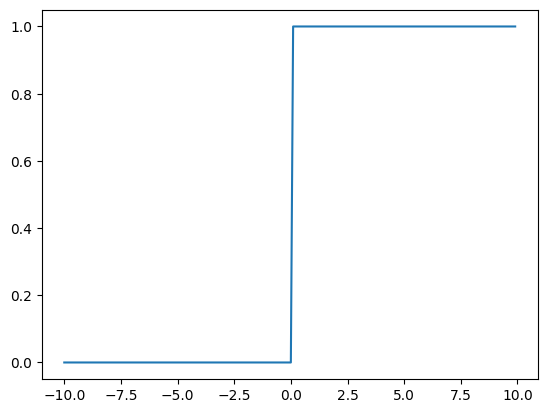

In [52]:
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 0.1)
y = step_func(x)
plt.plot(x, y)
plt.show()

In [53]:
# Sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [56]:
sigmoid(0.2)

0.549833997312478

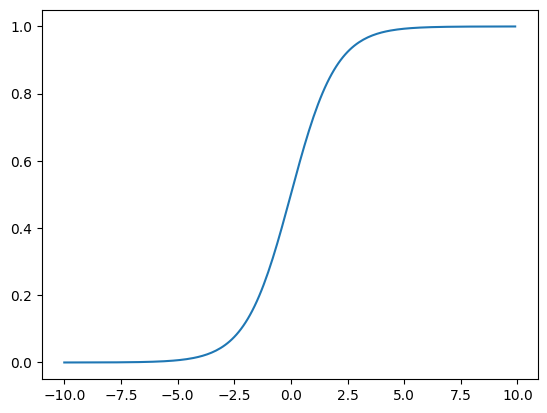

In [57]:
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

In [59]:
# ReLU
def relu(x):
    return np.maximum(0, x)

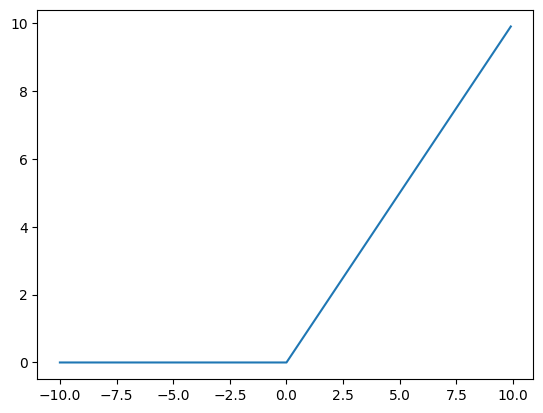

In [60]:
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()

### 신경망에서의 행렬 곱

In [61]:
W = np.array([[1, 3, 5], [2, 4, 6]])
X = np.array([1, 2])

def weight_sum(X, W):
    return np.dot(X, W)

weight_sum(X, W)

array([ 5, 11, 17])

In [66]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

def weight_sum_with_bias(X, W, B):
    return np.dot(X, W) + B

weight_sum_with_bias(X, W1, B1)

array([0.3, 0.7, 1.1])

In [71]:
def forward(X, W, B):
    return sigmoid(weight_sum_with_bias(X, W, B))

Z1 = forward(X, W1, B1)
print(Z1.shape)
print(Z1)

(3,)
[0.57444252 0.66818777 0.75026011]


In [73]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

Z2 = forward(Z1, W2, B2)

print(Z2.shape)
print(Z2)

(2,)
[0.62624937 0.7710107 ]


In [74]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

Z3 = forward(Z2, W3, B3)

print(Z3.shape)
print(Z3)

(2,)
[0.57855079 0.66736228]


In [76]:
X = np.array([1.0, 0.5])

W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

weight = [W1, W2, W3]
bias = [B1, B2, B3]

def identity_func(X):
    return X

def forward(X, weight, bias):
    Z1 = sigmoid(weight_sum_with_bias(X, weight[0], bias[0]))
    Z2 = sigmoid(weight_sum_with_bias(Z1, weight[1], bias[1]))
    Z3 = identity_func(weight_sum_with_bias(Z2, weight[2], bias[2]))

    return Z3

res = forward(X, weight, bias)
print(res)


[0.31682708 0.69627909]


## 출력층 설계

### 항등함수와 소프트맥스 함수 구현하기

In [89]:
X = np.array([1010, 1000, 990])


In [90]:
# Softmax
def softmax(X):
    return np.exp(X)/np.sum(np.exp(X))

softmax(X)

C:\Users\BRAIN\AppData\Local\Temp\ipykernel_18608\2089282292.py:3: RuntimeWarning: overflow encountered in exp
  return np.exp(X)/np.sum(np.exp(X))
C:\Users\BRAIN\AppData\Local\Temp\ipykernel_18608\2089282292.py:3: RuntimeWarning: invalid value encountered in divide
  return np.exp(X)/np.sum(np.exp(X))


array([nan, nan, nan])

In [91]:
# Softmax
def softmax(X):
    C = np.max(X)
    return np.exp(X-C)/np.sum(np.exp(X-C))

softmax(X)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])